<a href="https://colab.research.google.com/github/gilmarschwarz/machine-learning/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.14.0
!pip install tensorflow-text

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [3]:
tf.__version__

'2.14.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1467 - accuracy: 0.9543 - val_loss: 0.0443 - val_accuracy: 0.9877
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0320 - val_accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0302 - val_accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0371 - val_accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0305 - val_accuracy: 0.9905


In [10]:
y_true=test_labels
y_pred=np.argmax(model.predict(test_images), axis=-1)


313/313 [==============================] - 2s 6ms/step


In [11]:
classes=[0,1,2,3,4,5,6,7,8,9]

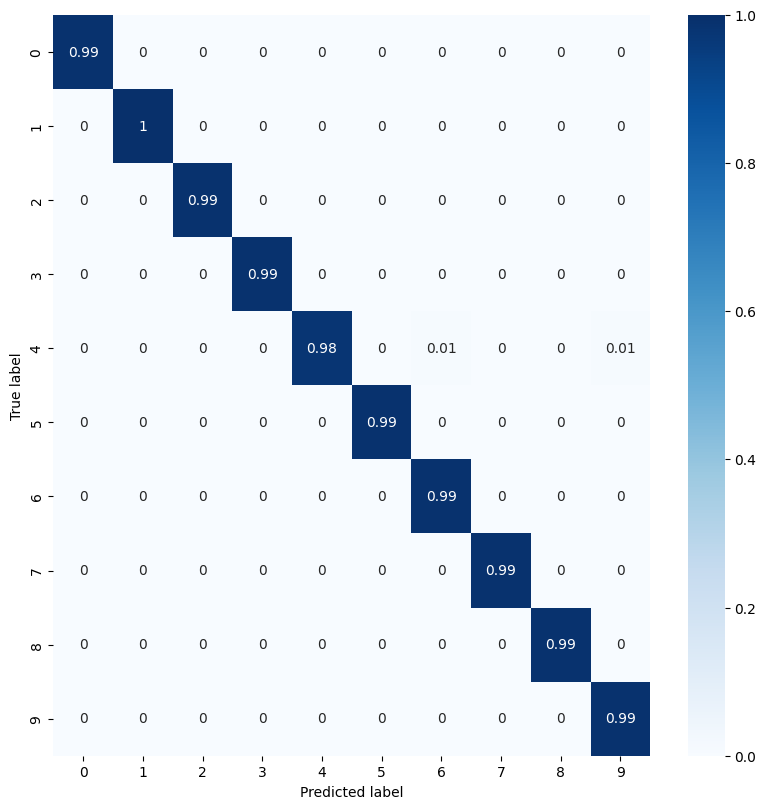

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
con_mat

array([[ 973,    1,    1,    0,    0,    0,    1,    4,    0,    0],
       [   2, 1130,    1,    0,    0,    1,    1,    0,    0,    0],
       [   0,    1, 1023,    4,    0,    0,    1,    3,    0,    0],
       [   0,    0,    0, 1002,    0,    5,    0,    2,    1,    0],
       [   0,    1,    0,    0,  960,    0,    6,    3,    0,   12],
       [   0,    0,    0,    3,    0,  886,    1,    1,    0,    1],
       [   3,    2,    0,    0,    1,    1,  950,    0,    1,    0],
       [   0,    4,    2,    0,    0,    0,    0, 1019,    1,    2],
       [   1,    1,    1,    1,    0,    1,    0,    2,  965,    2],
       [   0,    1,    0,    0,    3,    4,    0,    1,    3,  997]],
      dtype=int32)

In [23]:
Accuracy = sum(y_pred == y_true) / len(y_pred)
print("Accuracy using formula: ", Accuracy)

Accuracy using formula:  0.9905


In [39]:
from sklearn import metrics

Accuracy = metrics.accuracy_score(y_true, y_pred)
print("Accuracy using sklearn: ", Accuracy)

Accuracy using sklearn:  0.9905


In [47]:
Precision = metrics.precision_score(y_true, y_pred, average=None)
print("Precision: ", Precision)

Precision:  [0.9938713  0.99035933 0.99513619 0.99207921 0.99585062 0.98663697
 0.98958333 0.98454106 0.9938208  0.98323471]


In [48]:
Sensitivity_recall = metrics.recall_score(y_true, y_pred, average=None)
print("Sensitivity: ", Sensitivity_recall)

Sensitivity:  [0.99285714 0.99559471 0.99127907 0.99207921 0.97759674 0.99327354
 0.99164927 0.99124514 0.99075975 0.98810704]


In [44]:
Specificity = metrics.recall_score(y_true, y_pred, pos_label=0, average=None)
print("Specificity: ", Specificity)

Specificity:  [0.99285714 0.99559471 0.99127907 0.99207921 0.97759674 0.99327354
 0.99164927 0.99124514 0.99075975 0.98810704]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [46]:
F1_score = metrics.f1_score(y_true, y_pred, average=None)
print("F1 score: ", F1_score)

F1 score:  [0.99336396 0.99297012 0.99320388 0.99207921 0.98663926 0.98994413
 0.99061522 0.98788173 0.99228792 0.98566485]
